# ISYE 6740 Project

In [124]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import metrics

## Data

I stored the data in a file like: 'C:\Users\megan\Desktop\ISYE 6740\Project\data'

In [6]:
path_old = os.path.abspath('data')
path = 'C:\\Users\\megan\\Desktop\\ISYE_6740\\Project\data'
file_name = "final_data.csv"
df = pd.read_csv(path+"\\"+file_name)

In [7]:
#df = pd.read_csv('final_data.csv')

In [8]:
df=df.dropna().reset_index(drop=True)

In [9]:
df.head()

,ticker,permno,rdq,datadate,fqtr,fyearq,exchcd,exch,exch_ticker,Company_Name,...,move_pct,move_nom,move_cum_pct_1,move_cum_nom_1,move_cum_pct_2,move_cum_nom_2,cusip,Error,thresholds_passed,Earnings_Move
0,JJSF,10026,2015-07-27,2015-06-30,3,2015,3,NASDAQ,NASDAQ:JJSF,J & J Snack Foods Corp.,...,0.0,0.0,0.0,0.0,0.0,0.0,46603210,False,0.0,0
1,JJSF,10026,2015-11-05,2015-09-30,4,2015,3,NASDAQ,NASDAQ:JJSF,J & J Snack Foods Corp.,...,0.0,0.0,0.0,0.0,0.0,0.0,46603210,False,0.0,0
2,JJSF,10026,2016-01-25,2015-12-31,1,2016,3,NASDAQ,NASDAQ:JJSF,J & J Snack Foods Corp.,...,0.0,0.0,0.0,0.0,0.0,0.0,46603210,False,0.0,0
3,JJSF,10026,2016-04-25,2016-03-31,2,2016,3,NASDAQ,NASDAQ:JJSF,J & J Snack Foods Corp.,...,0.0,0.0,0.0,0.0,0.0,0.0,46603210,False,0.0,0
4,JJSF,10026,2016-07-25,2016-06-30,3,2016,3,NASDAQ,NASDAQ:JJSF,J & J Snack Foods Corp.,...,0.0,0.0,0.0,0.0,0.0,0.0,46603210,False,0.0,0


In [10]:
recc_dummy = pd.get_dummies(df['IQ_AVG_BROKER_REC'])
df=pd.concat([df,recc_dummy],axis=1)

In [11]:
df.columns

Index(['ticker', 'permno', 'rdq', 'datadate', 'fqtr', 'fyearq', 'exchcd',
       'exch', 'exch_ticker', 'Company_Name', 'IQ_TOTAL_DEBT_EQUITY',
       'IQ_TOTAL_DEBT_CAPITAL', 'IQ_EBITDA_INT', 'IQ_EBITDA_CAPEX_INT',
       'IQ_TOTAL_DEBT_EBITDA', 'IQ_RETURN_ASSETS', 'IQ_RETURN_CAPITAL',
       'IQ_RETURN_EQUITY', 'IQ_GROSS_MARGIN', 'IQ_EBITDA_MARGIN',
       'IQ_NI_MARGIN', 'IQ_CURRENT_RATIO', 'IQ_QUICK_RATIO',
       'IQ_DAYS_SALES_OUT', 'IQ_DAYS_INVENTORY_OUT', 'IQ_TOTAL_REV',
       'IQ_EBITDA', 'IQ_NI_CF', 'IQ_TOTAL_ASSETS', 'IQ_TOTAL_LIAB',
       'IQ_TOTAL_EQUITY', 'IQ_PBV', 'IQ_TEV_EBITDA', 'IQ_TEV_TOTAL_REV',
       'IQ_TOTAL_REV_1YR_ANN_GROWTH', 'IQ_EBITDA_1YR_ANN_GROWTH',
       'IQ_EBIT_1YR_ANN_GROWTH', 'IQ_NI_1YR_ANN_GROWTH',
       'IQ_EPS_1YR_ANN_GROWTH', 'IQ_AVG_BROKER_REC', 'IQ_AVG_BROKER_REC_NO',
       'IQ_PRICE_TARGET', 'IQ_EPS_EST', 'IQ_EST_EPS_GROWTH_5YR',
       'IQ_EPS_EST.1', 'IQ_REVENUE_EST', 'IQ_EBITDA_EST', 'IQ_EBIT_EST',
       'IQ_NI_EST', 'IQ_CFPS_EST', 'I

In [12]:
analysis_df=df[['IQ_TOTAL_DEBT_EQUITY',
       'IQ_TOTAL_DEBT_CAPITAL', 'IQ_EBITDA_INT', 'IQ_EBITDA_CAPEX_INT',
       'IQ_TOTAL_DEBT_EBITDA', 'IQ_RETURN_ASSETS', 'IQ_RETURN_CAPITAL',
       'IQ_RETURN_EQUITY', 'IQ_GROSS_MARGIN', 'IQ_EBITDA_MARGIN',
       'IQ_NI_MARGIN', 'IQ_CURRENT_RATIO', 'IQ_QUICK_RATIO',
       'IQ_DAYS_SALES_OUT', 'IQ_DAYS_INVENTORY_OUT', 'IQ_TOTAL_REV',
       'IQ_EBITDA', 'IQ_NI_CF', 'IQ_TOTAL_ASSETS', 'IQ_TOTAL_LIAB',
       'IQ_TOTAL_EQUITY', 'IQ_PBV', 'IQ_TEV_EBITDA', 'IQ_TEV_TOTAL_REV',
       'IQ_TOTAL_REV_1YR_ANN_GROWTH', 'IQ_EBITDA_1YR_ANN_GROWTH',
       'IQ_EBIT_1YR_ANN_GROWTH', 'IQ_NI_1YR_ANN_GROWTH',
       'IQ_EPS_1YR_ANN_GROWTH', 'IQ_AVG_BROKER_REC_NO',
       'IQ_PRICE_TARGET', 'IQ_EPS_EST', 'IQ_EST_EPS_GROWTH_5YR',
       'IQ_EPS_EST.1', 'IQ_REVENUE_EST', 'IQ_EBITDA_EST', 'IQ_EBIT_EST',
       'IQ_NI_EST', 'IQ_CFPS_EST', 'IQ_EST_NUM_BUY', 'IQ_EST_NUM_HOLD',
       'IQ_EST_NUM_SELL', 'IQ_EST_EPS_DIFF', 'IQ_EST_EPS_SURPRISE_PERCENT',
       'IQ_EST_REV_DIFF', 'IQ_EST_REV_SURPRISE_PERCENT','Buy', 'Hold', 'No Opinion', 'Outperform', 'Sell',
       'Underperform','Earnings_Move']]

In [13]:
analysis_df['Earnings_Move'].value_counts()

0    24965
1     1198
Name: Earnings_Move, dtype: int64

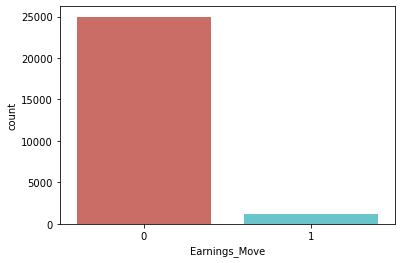

In [14]:
sns.countplot(x='Earnings_Move',data=analysis_df,palette='hls')
plt.show()

In [15]:
analysis_df.columns

Index(['IQ_TOTAL_DEBT_EQUITY', 'IQ_TOTAL_DEBT_CAPITAL', 'IQ_EBITDA_INT',
       'IQ_EBITDA_CAPEX_INT', 'IQ_TOTAL_DEBT_EBITDA', 'IQ_RETURN_ASSETS',
       'IQ_RETURN_CAPITAL', 'IQ_RETURN_EQUITY', 'IQ_GROSS_MARGIN',
       'IQ_EBITDA_MARGIN', 'IQ_NI_MARGIN', 'IQ_CURRENT_RATIO',
       'IQ_QUICK_RATIO', 'IQ_DAYS_SALES_OUT', 'IQ_DAYS_INVENTORY_OUT',
       'IQ_TOTAL_REV', 'IQ_EBITDA', 'IQ_NI_CF', 'IQ_TOTAL_ASSETS',
       'IQ_TOTAL_LIAB', 'IQ_TOTAL_EQUITY', 'IQ_PBV', 'IQ_TEV_EBITDA',
       'IQ_TEV_TOTAL_REV', 'IQ_TOTAL_REV_1YR_ANN_GROWTH',
       'IQ_EBITDA_1YR_ANN_GROWTH', 'IQ_EBIT_1YR_ANN_GROWTH',
       'IQ_NI_1YR_ANN_GROWTH', 'IQ_EPS_1YR_ANN_GROWTH', 'IQ_AVG_BROKER_REC_NO',
       'IQ_PRICE_TARGET', 'IQ_EPS_EST', 'IQ_EST_EPS_GROWTH_5YR',
       'IQ_EPS_EST.1', 'IQ_REVENUE_EST', 'IQ_EBITDA_EST', 'IQ_EBIT_EST',
       'IQ_NI_EST', 'IQ_CFPS_EST', 'IQ_EST_NUM_BUY', 'IQ_EST_NUM_HOLD',
       'IQ_EST_NUM_SELL', 'IQ_EST_EPS_DIFF', 'IQ_EST_EPS_SURPRISE_PERCENT',
       'IQ_EST_REV_DIFF', 'IQ_

In [16]:
features_df = analysis_df[['IQ_TOTAL_DEBT_EQUITY', 'IQ_TOTAL_DEBT_CAPITAL', 'IQ_EBITDA_INT',
       'IQ_EBITDA_CAPEX_INT', 'IQ_TOTAL_DEBT_EBITDA', 'IQ_RETURN_ASSETS',
       'IQ_RETURN_CAPITAL', 'IQ_RETURN_EQUITY', 'IQ_GROSS_MARGIN',
       'IQ_EBITDA_MARGIN', 'IQ_NI_MARGIN', 'IQ_CURRENT_RATIO',
       'IQ_QUICK_RATIO', 'IQ_DAYS_SALES_OUT', 'IQ_DAYS_INVENTORY_OUT',
       'IQ_TOTAL_REV', 'IQ_EBITDA', 'IQ_NI_CF', 'IQ_TOTAL_ASSETS',
       'IQ_TOTAL_LIAB', 'IQ_TOTAL_EQUITY', 'IQ_PBV', 'IQ_TEV_EBITDA',
       'IQ_TEV_TOTAL_REV', 'IQ_TOTAL_REV_1YR_ANN_GROWTH',
       'IQ_EBITDA_1YR_ANN_GROWTH', 'IQ_EBIT_1YR_ANN_GROWTH',
       'IQ_NI_1YR_ANN_GROWTH', 'IQ_EPS_1YR_ANN_GROWTH',
       'IQ_AVG_BROKER_REC_NO', 'IQ_PRICE_TARGET', 'IQ_EPS_EST',
       'IQ_EST_EPS_GROWTH_5YR', 'IQ_EPS_EST.1', 'IQ_REVENUE_EST',
       'IQ_EBITDA_EST', 'IQ_EBIT_EST', 'IQ_NI_EST', 'IQ_CFPS_EST',
       'IQ_EST_NUM_BUY', 'IQ_EST_NUM_HOLD', 'IQ_EST_NUM_SELL',
       'IQ_EST_EPS_DIFF', 'IQ_EST_EPS_SURPRISE_PERCENT', 'IQ_EST_REV_DIFF',
       'IQ_EST_REV_SURPRISE_PERCENT','Buy', 'Hold', 'No Opinion',
       'Outperform', 'Sell', 'Underperform']]
y = analysis_df['Earnings_Move']

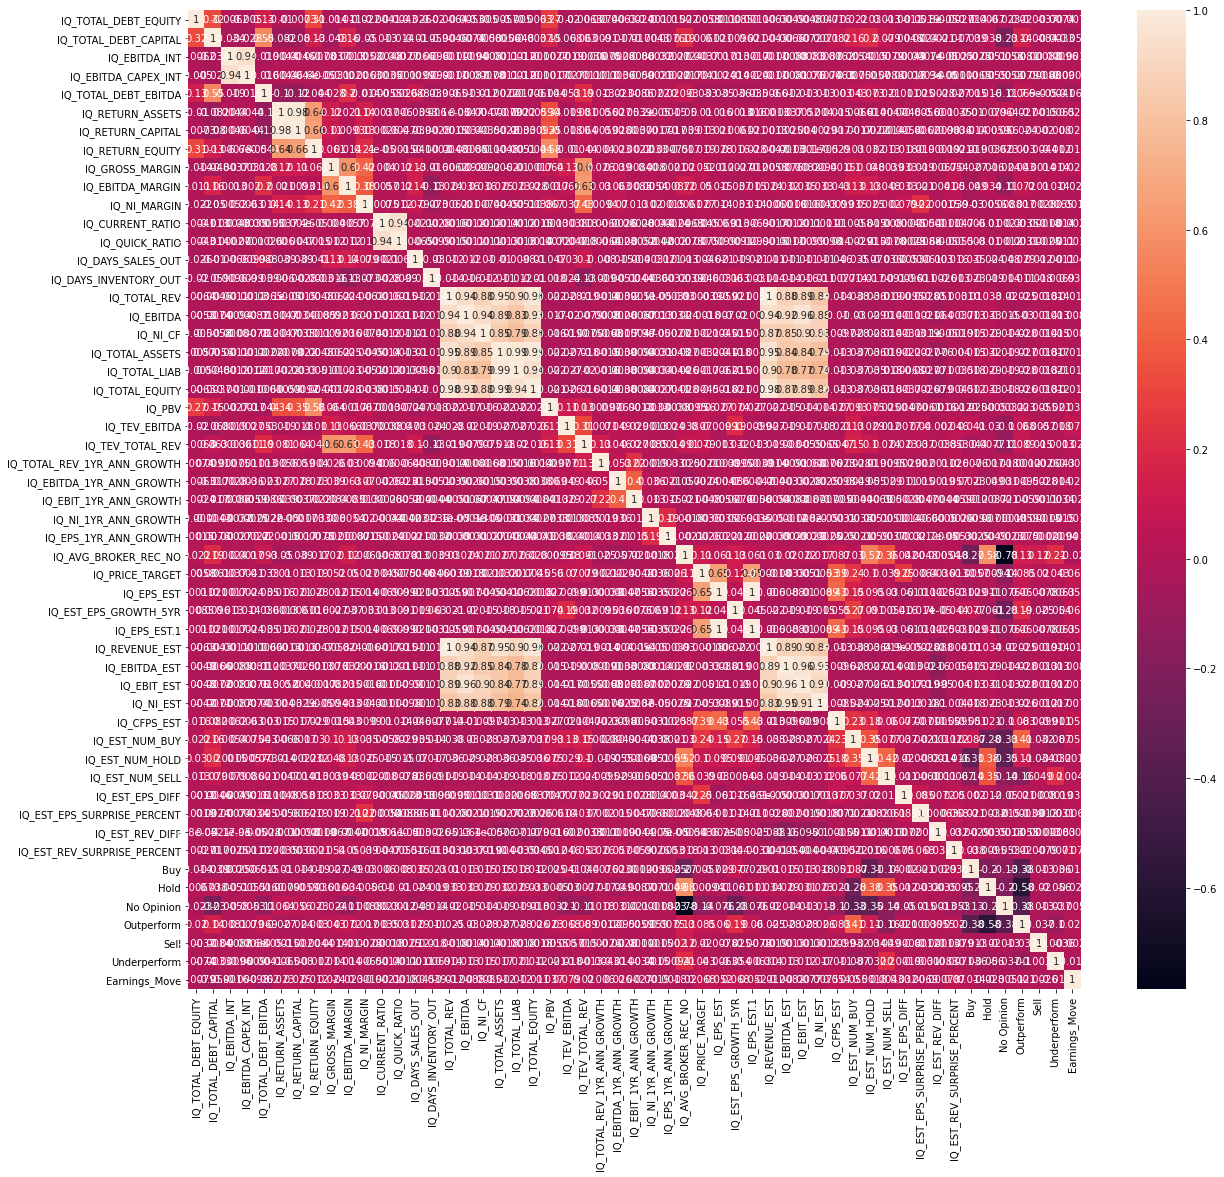

In [17]:
corrMatrix = analysis_df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(corrMatrix["Earnings_Move"])
cor_target

IQ_TOTAL_DEBT_EQUITY           0.007870
IQ_TOTAL_DEBT_CAPITAL          0.058862
IQ_EBITDA_INT                  0.001602
IQ_EBITDA_CAPEX_INT            0.000981
IQ_TOTAL_DEBT_EBITDA           0.062070
IQ_RETURN_ASSETS               0.022799
IQ_RETURN_CAPITAL              0.025105
IQ_RETURN_EQUITY               0.012267
IQ_GROSS_MARGIN                0.024168
IQ_EBITDA_MARGIN               0.023400
IQ_NI_MARGIN                   0.001883
IQ_CURRENT_RATIO               0.002094
IQ_QUICK_RATIO                 0.001761
IQ_DAYS_SALES_OUT              0.004460
IQ_DAYS_INVENTORY_OUT          0.039363
IQ_TOTAL_REV                   0.011782
IQ_EBITDA                      0.008785
IQ_NI_CF                       0.008455
IQ_TOTAL_ASSETS                0.011514
IQ_TOTAL_LIAB                  0.011555
IQ_TOTAL_EQUITY                0.011173
IQ_PBV                         0.037252
IQ_TEV_EBITDA                  0.079040
IQ_TEV_TOTAL_REV               0.020257
IQ_TOTAL_REV_1YR_ANN_GROWTH    0.005953


## Feature Selection

May want to consider statsmodels to see p-values

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Step regression maybe, regularized logistic regression, PCA?

## Train/Test

Create train/test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.2, random_state=42,shuffle=True)

## Models

Need to balance data:
- Can try resampling
- Can try undersampling
- SMOTE

Models to try:
- Logistic Regression
- SVM
- RandomForest
- XGBoost

In [17]:
y_test.value_counts() #Keep this is mind when looking at the confusion matrices

0    4999
1     234
Name: Earnings_Move, dtype: int64

### Logistic Regression

In [16]:
model = LogisticRegression(random_state=42).fit(X_train,y_train)
predictions=model.predict(X_test)
np.sum(predictions==y_test)/len(y_test)

C:\Users\megan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
cm=confusion_matrix(y_test,predictions)
cm

Code to make a "pretty" confusion matrix - needs some work to actually make it pretty

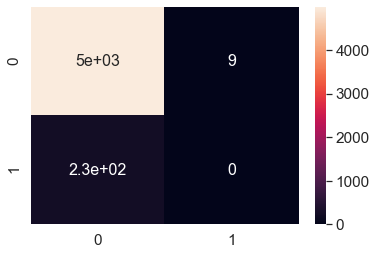

In [25]:
df_cm = pd.DataFrame(cm)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

### RandomForest

In [28]:
model_2 = RandomForestClassifier().fit(X_train,y_train)
predictions=model_2.predict(X_test)
np.sum(predictions==y_test)/len(y_test)

C:\Users\megan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
cm=confusion_matrix(y_test,predictions)
cm

array([[4985,   14],
       [ 224,   10]], dtype=int64)

### XGBoost

In [287]:
def modelfit(alg, dtrain, dtest,predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Earnings_Move'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='aucpr', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print("Number of estimators: %f" %cvresult.shape[0])
        #print("CV mean %f" %cvresult.mean_)
    
    #Fit the algorithm on the train data
    alg.fit(dtrain[predictors], dtrain['Earnings_Move'],eval_metric='aucpr')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Earnings_Move'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Earnings_Move'], dtrain_predprob))
    print("F1 Score (Train): %f" % f1_score(dtrain['Earnings_Move'], dtrain_predictions))
    print("AUCPR (Train): %f" % metrics.average_precision_score(dtrain['Earnings_Move'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
        
    #Predict test set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report Test")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtest['Earnings_Move'].values, dtest_predictions))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['Earnings_Move'], dtest_predprob))
    print("F1 Score (Test): %f" % f1_score(dtest['Earnings_Move'], dtest_predictions))
    print("AUCPR (Test): %f" % metrics.average_precision_score(dtest['Earnings_Move'], dtest_predprob))
                    

    
    return dtest_predictions,dtest_predprob
    

In [273]:
dtrain = pd.concat([X_train,y_train],axis=1)
dtest = pd.concat([X_test,y_test],axis=1)

Number of estimators: 39.000000

Model Report
Accuracy : 0.9565
AUC Score (Train): 0.925368
F1 Score (Train): 0.125000
AUCPR (Train): 0.477196

Model Report Test
Accuracy : 0.9562
AUC Score (Test): 0.825117
F1 Score (Test): 0.072874
AUCPR (Test): 0.234631


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

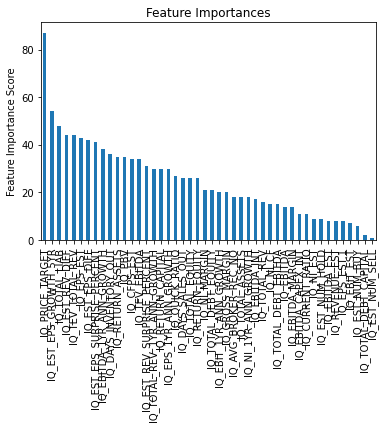

In [274]:
predictors = ['IQ_TOTAL_DEBT_EQUITY', 'IQ_TOTAL_DEBT_CAPITAL', 'IQ_EBITDA_INT',
       'IQ_EBITDA_CAPEX_INT', 'IQ_TOTAL_DEBT_EBITDA', 'IQ_RETURN_ASSETS',
       'IQ_RETURN_CAPITAL', 'IQ_RETURN_EQUITY', 'IQ_GROSS_MARGIN',
       'IQ_EBITDA_MARGIN', 'IQ_NI_MARGIN', 'IQ_CURRENT_RATIO',
       'IQ_QUICK_RATIO', 'IQ_DAYS_SALES_OUT', 'IQ_DAYS_INVENTORY_OUT',
       'IQ_TOTAL_REV', 'IQ_EBITDA', 'IQ_NI_CF', 'IQ_TOTAL_ASSETS',
       'IQ_TOTAL_LIAB', 'IQ_TOTAL_EQUITY', 'IQ_PBV', 'IQ_TEV_EBITDA',
       'IQ_TEV_TOTAL_REV', 'IQ_TOTAL_REV_1YR_ANN_GROWTH',
       'IQ_EBITDA_1YR_ANN_GROWTH', 'IQ_EBIT_1YR_ANN_GROWTH',
       'IQ_NI_1YR_ANN_GROWTH', 'IQ_EPS_1YR_ANN_GROWTH',
       'IQ_AVG_BROKER_REC_NO', 'IQ_PRICE_TARGET', 'IQ_EPS_EST',
       'IQ_EST_EPS_GROWTH_5YR', 'IQ_EPS_EST.1', 'IQ_REVENUE_EST',
       'IQ_EBITDA_EST', 'IQ_EBIT_EST', 'IQ_NI_EST', 'IQ_CFPS_EST',
       'IQ_EST_NUM_BUY', 'IQ_EST_NUM_HOLD', 'IQ_EST_NUM_SELL',
       'IQ_EST_EPS_DIFF', 'IQ_EST_EPS_SURPRISE_PERCENT', 'IQ_EST_REV_DIFF',
       'IQ_EST_REV_SURPRISE_PERCENT','Buy', 'Hold', 'No Opinion',
       'Outperform', 'Sell', 'Underperform']
xgb1 = xgb.XGBClassifier(
 eta =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb1, dtrain, dtest, predictors)

#### Tune min_child_weight and max_depth

max_depth = maximum number of nodes allowed from the root to the farthest leaf of a tree
min_child_weight = is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.
bias v variance tradeoff

In [223]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(eta =0.1, n_estimators=38, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42), 
param_grid = param_test1, scoring='f1',n_jobs=-1,iid=False, cv=5,verbose=1)
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   38.9s finished
C:\Users\megan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, eta=0.1, max_depth=5,
                                     n_estimators=38, nthread=4, seed=42,
                                     subsample=0.8),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='f1', verbose=1)

In [224]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 3}, 0.08373428673441834)

#### Tune gamma

A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [225]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)],
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( eta =0.1, n_estimators=38, max_depth=7,
min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42), 
param_grid = param_test3, scoring='f1',n_jobs=-1,iid=False, cv=5,verbose=1)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.2s finished
C:\Users\megan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.0}, 0.08373428673441834)

Number of estimators: 55.000000

Model Report
Accuracy : 0.9664
AUC Score (Train): 0.979099
F1 Score (Train): 0.430421
AUCPR (Train): 0.796682

Model Report Test
Accuracy : 0.9545
AUC Score (Test): 0.826034
F1 Score (Test): 0.091603
AUCPR (Test): 0.213273


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

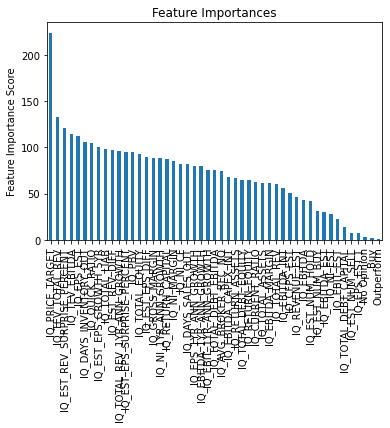

In [275]:
xgb1 = xgb.XGBClassifier(
 eta =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb1, dtrain, dtest, predictors)

#### Tune subsample and colsample_bytree

subsample corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
colsample_bytree corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.

Instead of using the whole training set every time, we can build a tree on slightly different data at each step, which makes it less likely to overfit to a single sample or feature.

In [227]:
param_test4 = {
  'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier(eta =0.1, n_estimators=54, max_depth=7,
min_child_weight=3, gamma=.4, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42), 
param_grid = param_test4, scoring='f1',n_jobs=-1,iid=False, cv=5,verbose=1)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished
C:\Users\megan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.9, 'subsample': 0.7}, 0.08373428673441834)

#### Tune scale_pos_weight

Weights positive responses more heavily in the algorithm

In [228]:
param_test5 = {
  'scale_pos_weight': np.arange(0,110,10)
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=54, max_depth=7,
min_child_weight=3, gamma=0, subsample=0.7, colsample_bytree=0.9,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42), 
param_grid = param_test5, scoring='f1',n_jobs=-1,iid=False, cv=5,verbose=1)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.0min finished
C:\Users\megan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'scale_pos_weight': 10}, 0.29872639942111456)

#### Tune alpha and lambda

Regularization constants

In [229]:
param_test6 = {
  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
    
}
gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=54, max_depth=7,
min_child_weight=3, gamma=0, subsample=0.7, colsample_bytree=0.9,
objective= 'binary:logistic', nthread=4, scale_pos_weight=10, seed=42), 
param_grid = param_test6, scoring='f1',n_jobs=-1,iid=False, cv=5,verbose=1)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  2.8min finished
C:\Users\megan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'reg_alpha': 1, 'reg_lambda': 100}, 0.30875354309004577)

#### ETA

Lower the learning rate to decrease overfitting eta = learning rate, corresponds to the shrinkage of the weights associated to features after each round, in other words it defines the amount of "correction" we make at each step

corresponds to the shrinkage of the weights associated to features after each round, in other words it defines the amount of "correction" we make at each step

lower eta makes our model more robust to overfitting thus, usually, the lower the learning rate, the best. But with a lower eta, we need more boosting rounds, which takes more time to train

#### Final Model


Model Report
Accuracy : 0.9497
AUC Score (Train): 0.982443
F1 Score (Train): 0.629055
AUCPR (Train): 0.718176

Model Report Test
Accuracy : 0.9163
AUC Score (Test): 0.837408
F1 Score (Test): 0.293548
AUCPR (Test): 0.240575


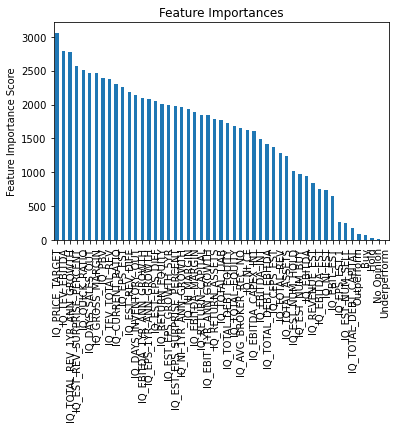

In [288]:
xgb4 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=3,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 reg_alpha=1,
    reg_lambda=100,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=10,
 seed=42)
pred,pred_prob=modelfit(xgb4, dtrain, dtest,predictors, useTrainCV=False)


In [ ]:
confusion_matrix(y_test,pred)

In [290]:
accuracy_xgb = metrics.accuracy_score(y_test,pred)
#recall = metrics.recall_score(y_test,pred)
#avg_precision = metrics.average_precision_score(y_test,pred)
#precision = metrics.precision_score(y_test,pred)
f_1_xgb = metrics.f1_score(y_test,pred)
roc_auc_xgb=roc_auc_score(y_test, pred_prob)
final_results = pd.DataFrame({'Model':['xgboost'],'Accuracy':[accuracy_xgb],'F1 Score':[f_1_xgb],'AUC':[roc_auc_xgb]})

In [291]:
final_results

,Model,Accuracy,F1 Score,AUC
0,xgboost,0.9163,0.293548,0.837408


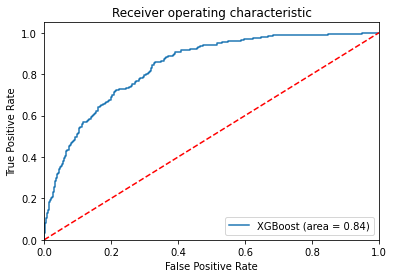

In [292]:
print_auroc_graph(model, 'XGBoost', X_train, y_train, X_test, y_test)

## Upsampling Minority, DownSampling Majority Class

To achieve a more meaningful accuracy score, we will resample our dataset to have a more balanced proportion of classes. Using the SMOTE algorithm, we will also synthetically manufacture additional data points in the minority class In addition, we will measure the Roc Auc score as well as accuracy to get an additional perspective on which model is most effective

In [171]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [172]:
def evaluate_model_with_resampling(model, X, Y):
    #establish the resampling strategy
    over=SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline=Pipeline(steps)
    
    #evaluate new dataset/model using CV
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    accuracy_scores = cross_val_score(pipeline, X, Y, cv=cv, n_jobs=-1)
    roc_scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return accuracy_scores, roc_scores
    

In [173]:
#Logsitic Regression:
accuracy, roc = evaluate_model_with_resampling(LogisticRegression(random_state=42), features_df, y)
print(sum(accuracy)/len(accuracy))
print(sum(roc)/len(roc))

0.8828886257696384
0.6341097404345516


In [174]:
#Random Forest:
accuracy, roc = evaluate_model_with_resampling(RandomForestClassifier(), features_df, y)
print(sum(accuracy)/len(accuracy))
print(sum(roc)/len(roc))

0.9013112920810649
0.843369202316248


In [175]:
#Support Vector Machine:
accuracy, roc = evaluate_model_with_resampling(SVC(), features_df, y)
print(sum(accuracy)/len(accuracy))
print(sum(roc)/len(roc))

0.9542100930285278
0.4767079015398827


In [176]:
#AdaBoost Classifier
accuracy, roc = evaluate_model_with_resampling(AdaBoostClassifier(), features_df, y)
print(sum(accuracy)/len(accuracy))
print(sum(roc)/len(roc))

0.870465983997831
0.8088063827932711


## Code we could edit for possible graph of ROC/AUC curve

ROC and AUC

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [166]:
def print_auroc_graph(model, model_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

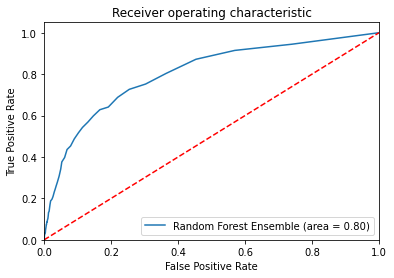

In [167]:
#AUROC for Random Forest Ensemble without resampling
print_auroc_graph(RandomForestClassifier(), 'Random Forest Ensemble', X_train, y_train, X_test, y_test)

In [168]:
#AUROC for Random Forest Ensemble without resampling
model = RandomForestClassifier()
over=SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline=Pipeline(steps)
print_auroc_graph(pipeline, 'Random Forest Ensemble', X_train, y_train, X_test, y_test)

NameError: name 'SMOTE' is not defined

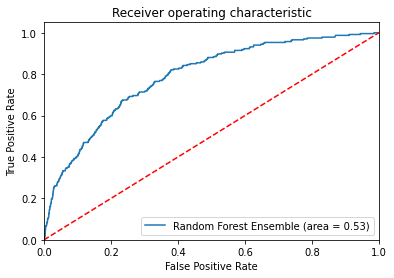

In [44]:
#AUROC for AdaBoost Ensemble after resampling
print_auroc_graph(AdaBoostClassifier(), 'Random Forest Ensemble', X_train, y_train, X_test, y_test)

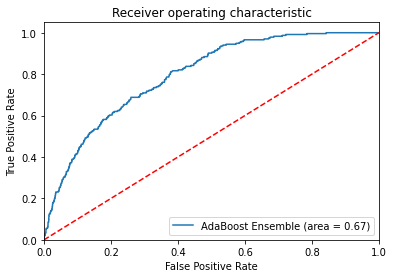

In [45]:
#AUROC for Random Forest Ensemble without resampling
model = AdaBoostClassifier()
over=SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline=Pipeline(steps)
print_auroc_graph(pipeline, 'AdaBoost Ensemble', X_train, y_train, X_test, y_test)